# A minimal ALF run

In this bare-bones example we use the [pyALF](https://git.physik.uni-wuerzburg.de/ALF/pyALF) interface to run the canonical Hubbard model on a default configuration: a $6\times6$ square grid, with interaction strength $U=4$ and inverse temperature $\beta = 5$.  

Bellow we go through the steps for performing the simulation and outputting observables.

---

**1.** Import `Simulation` class from the `py_alf` python module, which provides the interface with ALF:

In [1]:
import os
import numpy as np
from py_alf import Simulation              # Interface with ALF

**2.** Create an instance of `Simulation`, setting parameters as desired:

In [2]:
sim = Simulation(
    "Hubbard",                             # Hamiltonian
    {                                      # Model and simulation parameters for each Simulation instance
    "Model": "Hubbard",                    # Base model
    "Lattice_type": "Square"},             # Lattice type
    alf_dir=os.getenv('ALF_DIR', './ALF'), # Directory with ALF source code. Gets it from 
                                           # environment variable ALF_DIR, if present
)

**3.** Compile ALF, downloading it first from the [ALF repository](https://git.physik.uni-wuerzburg.de:ALF) if not found locally. This may take a few minutes:

In [3]:
sim.compile()                              # Compilation needs to be performed only once

Compiling ALF... Done.


**4.** Perform the simulation as specified in `sim`:

In [23]:
for i in range(3):
    sim.run()

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/ALF/Prog/ALF.out
Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/ALF/Prog/ALF.out
Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/ALF/Prog/ALF.out


In [20]:
sim.run()                                  # Perform the actual simulation in ALF

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/jonas/Programs/ALF/Prog/ALF.out


**New:** Derived observables

In [5]:
def R_k(obs, back, sign, N_orb, N_tau, dtau, latt, ks=[[0., 0.]], mat=None):
    # obs.shape = (N_orb, N_orb, N_tau, latt.N)
    if mat is None:
        mat = np.identity(N_orb)
    out = 0
    for k in ks:
        n = latt.k_to_n(k)

        J1 = (obs[..., n].sum(axis=-1) * mat).sum()
        J2 = 0
        for i in latt.NNk(n):
            J2 = J2 + (obs[..., i].sum(axis=-1) * mat).sum() / len(latt.NNk(n))
        out += (1 - J2/J1)

    return out / len(ks)

In [6]:
#def E_pot_kin()

In [7]:
sim.custom_obs['R_AFM']= {
    'needs': ['Spin_eq'],
    'function': R_k,
    'kwargs': {'ks': [[np.pi, np.pi]]}
}

**New:** Check warmup and autocorrelation

In [9]:
#import math
#import matplotlib.pyplot as plt

Ener_scal
Kin_scal
Pot_scal
(-29.76374705283625+0j) (0.00013879453029761035-0j)
(-48.26201919503132+0j) (4.3932800969490805e-05-0j)
(18.498272142195063+0j) (-0.00010869986099885627+0j)


/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


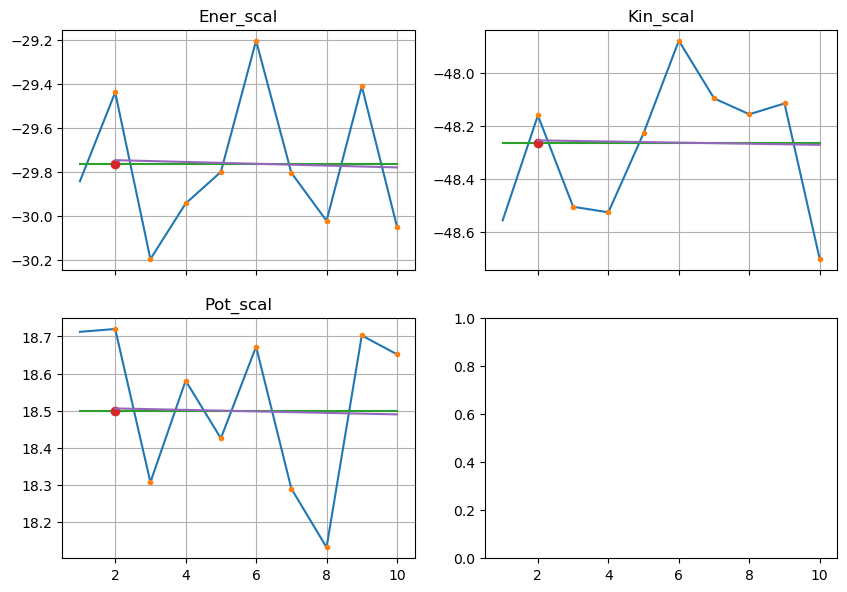

In [21]:
sim.check_warmup(['Ener_scal', 'Kin_scal', 'Pot_scal'])

Ener_scal
Kin_scal


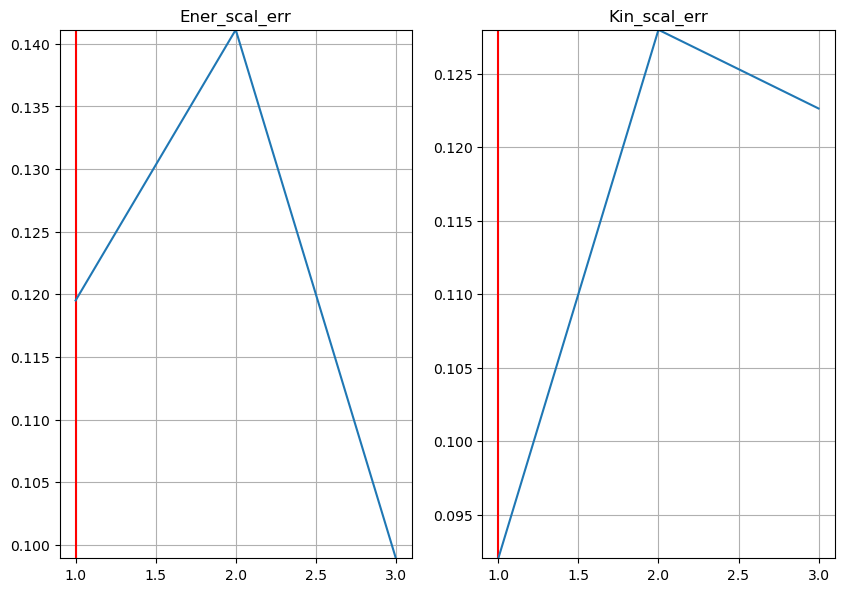

In [22]:
sim.check_rebin(['Ener_scal', 'Kin_scal'])

**5.** Perform some simple analyses:

In [11]:
sim.analysis()

### Analyzing /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square ###
/home/jonas/Programs/pyALF/Notebooks
already analyzed


**6.** Store computed observables list:

In [12]:
obs = sim.get_obs()
# Pandas Dataframe with one row per simulation, containing parameters and observables

/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square


In [14]:
obs

,continuous,ham_chem,ham_t,ham_t2,ham_tperp,ham_u,ham_u2,mz,l1,l2,...,SpinXY_tauK,SpinXY_tauK_err,SpinXY_tauR0,SpinXY_tauR0_err,SpinXY_tau_lattice,SpinZ_tauK,SpinZ_tauK_err,SpinZ_tauR0,SpinZ_tauR0_err,SpinZ_tau_lattice
/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square,0,0.0,1.0,1.0,1.0,4.0,4.0,1,6,6,...,"[[1.1081840477037448, 0.5192586021044865, 0.44...","[[0.0899225058607627, 0.15860095841400004, 0.0...","[0.7424858222171585, 0.6247428259079449, 0.555...","[0.002115854910419113, 0.00567682907884571, 0....","{'L1': [6.0, 0.0], 'L2': [0.0, 6.0], 'a1': [1....","[[0.911378537639076, 0.6500126682628463, 0.562...","[[0.05617745077821667, 0.04189521729661696, 0....","[0.7424621860533496, 0.6275894096503655, 0.542...","[0.002151244316258661, 0.0026106723760444092, ...","{'L1': [6.0, 0.0], 'L2': [0.0, 6.0], 'a1': [1...."


In [15]:
obs.iloc[0]

continuous                                                           0
ham_chem                                                           0.0
ham_t                                                              1.0
ham_t2                                                             1.0
ham_tperp                                                          1.0
                                           ...                        
SpinZ_tauK           [[0.911378537639076, 0.6500126682628463, 0.562...
SpinZ_tauK_err       [[0.05617745077821667, 0.04189521729661696, 0....
SpinZ_tauR0          [0.7424621860533496, 0.6275894096503655, 0.542...
SpinZ_tauR0_err      [0.002151244316258661, 0.0026106723760444092, ...
SpinZ_tau_lattice    {'L1': [6.0, 0.0], 'L2': [0.0, 6.0], 'a1': [1....
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square, Length: 110, dtype: object

which are available for further analyses. For instance, the internal energy of the system (and its error) is accessed by:

In [22]:
obs.iloc[0][['Ener_scal0', 'Ener_scal0_err', 'Ener_scal_sign', 'Ener_scal_sign_err']]

Ener_scal0           -29.845158
Ener_scal0_err         0.182653
Ener_scal_sign         1.000000
Ener_scal_sign_err     0.000000
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square, dtype: object

**New:** 2dplot on bravais lattice

In [16]:
from alf_ana.lattice import Lattice
import matplotlib.pyplot as plt
import matplotlib as mpl

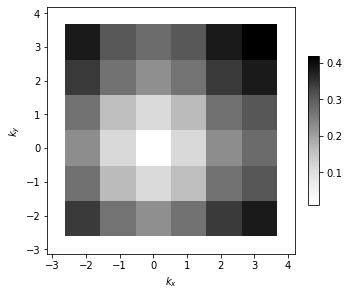

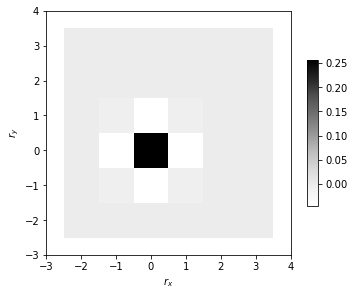

In [19]:
latt = Lattice(obs.iloc[0].Den_eq_lattice)
dat = obs.iloc[0].Den_eqK[0, 0]
latt.plot_k(dat)

dat = obs.iloc[0].Den_eqR[0, 0]
latt.plot_r(dat)